In [1]:
# This notebook shows how you can evaluate your model using lla library
# You can import your loader from loaders to plot loss landscapes and/or evaluate hessian

# This library is distributed under Apache 2.0 license

# (c) Kryptonite, 2024

In [ ]:
import copy
import argparse
import os
import random
import warnings

# import the main loss landscape analysis function
from src_lla import viz_lla

#import your loader here
from src_lla.loaders.src_LeNet import *

import matplotlib
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
exp_name = 'default'
data_path = '-1'
viz_dir = 'viz_results'
log_dir = None
weight_path = '-1'
num_plots = 2
num_per_plot = 2
epochs = None
lr = None
viz_rate = 1
mode = 'add'
normalization = None
order = 2
dist = 1
steps = 40
viz_dev = True
cap_loss = None
axes = 'hessian'
eval_hessian = False
seed = None
raa = None

to_save = False
to_viz = True

In [ ]:
if to_save:
    if not os.path.exists(viz_dir):
        os.makedirs(viz_dir)

In [ ]:
seed = 42

if seed is not None:
    random.seed(seed)
    #if np is not None:
    #    np.random.seed(seed)
    torch.random.manual_seed(seed)
    torch.use_deterministic_algorithms(True)
    if torch.cuda.is_available():
        os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

In [ ]:
cuda = True

In [ ]:
if cuda:
    print('checking if cuda is available...')
    device = "cuda" if torch.cuda.is_available() else "cpu"
    if device == 'cpu':
        print('Warning! --cuda was specified but cuda is not available!')
else:
    device = 'cpu'
print("Project running on device: ", device)

In [ ]:
allowed_axes = ['random', 'adam', 'hessian']

if axes not in allowed_axes:
    print('{} argument for axes is not supported, allowed {}!'.format(axes,allowed_axes))
    print('setting axes to random')
    axes = 'random'

if mode == 'adameq' or axes == 'adam':
    raise AttributeError('Adam axes analysis is not supported for evaluation, use train script to specify the optimizer')

if axes == 'random' and viz_dev:
    print('all_modes requires hessiann axes evaluation, setting axes to hessian!')
    axes = 'hessian'

if epochs is not None or lr is not None or log_dir is not None:
    warnings.warn('Some train flags are not supported for eval and will be ignored')

if normalization is None and order != 2:
    warnings.warn('Warning! Normalization order is specified but normalization is disabled!')

In [ ]:
# init train_loader
if data_path != '-1':
    train_loader = CustomLoader(shuffle=True,data_path=data_path)
else: # use default data path specified in loader
    train_loader = CustomLoader(shuffle=True)

# model can take other arguments, but it MUST take device
# note that weight_path = None is a valid option used for random weight init
if weight_path != '-1':
    model = ModelInit(device=device,weight_path=weight_path)
else:
    model = ModelInit(device=device)

# create metric object
x_plot, y_plot = iter(train_loader).__next__() # data that the evaluator will use when evaluating loss
metric = CustomLoss(x_plot, y_plot, device) # loss evaluator

cur_name = 'eval_' + exp_name
print('model and metric created successfully!')
#model.eval()

/usr/local/lib/python3.8/dist-packages/torch/autograd/__init__.py:197: UserWarning: Using backward() with create_graph=True will create a reference cycle between the parameter and its gradient which can cause a memory leak. We recommend using autograd.grad when creating the graph to avoid this. If you have to use this function, make sure to reset the .grad fields of your parameters to None after use to break the cycle and avoid the leak. (Triggered internally at ../torch/csrc/autograd/engine.cpp:1059.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


taking dirs from Hessian...


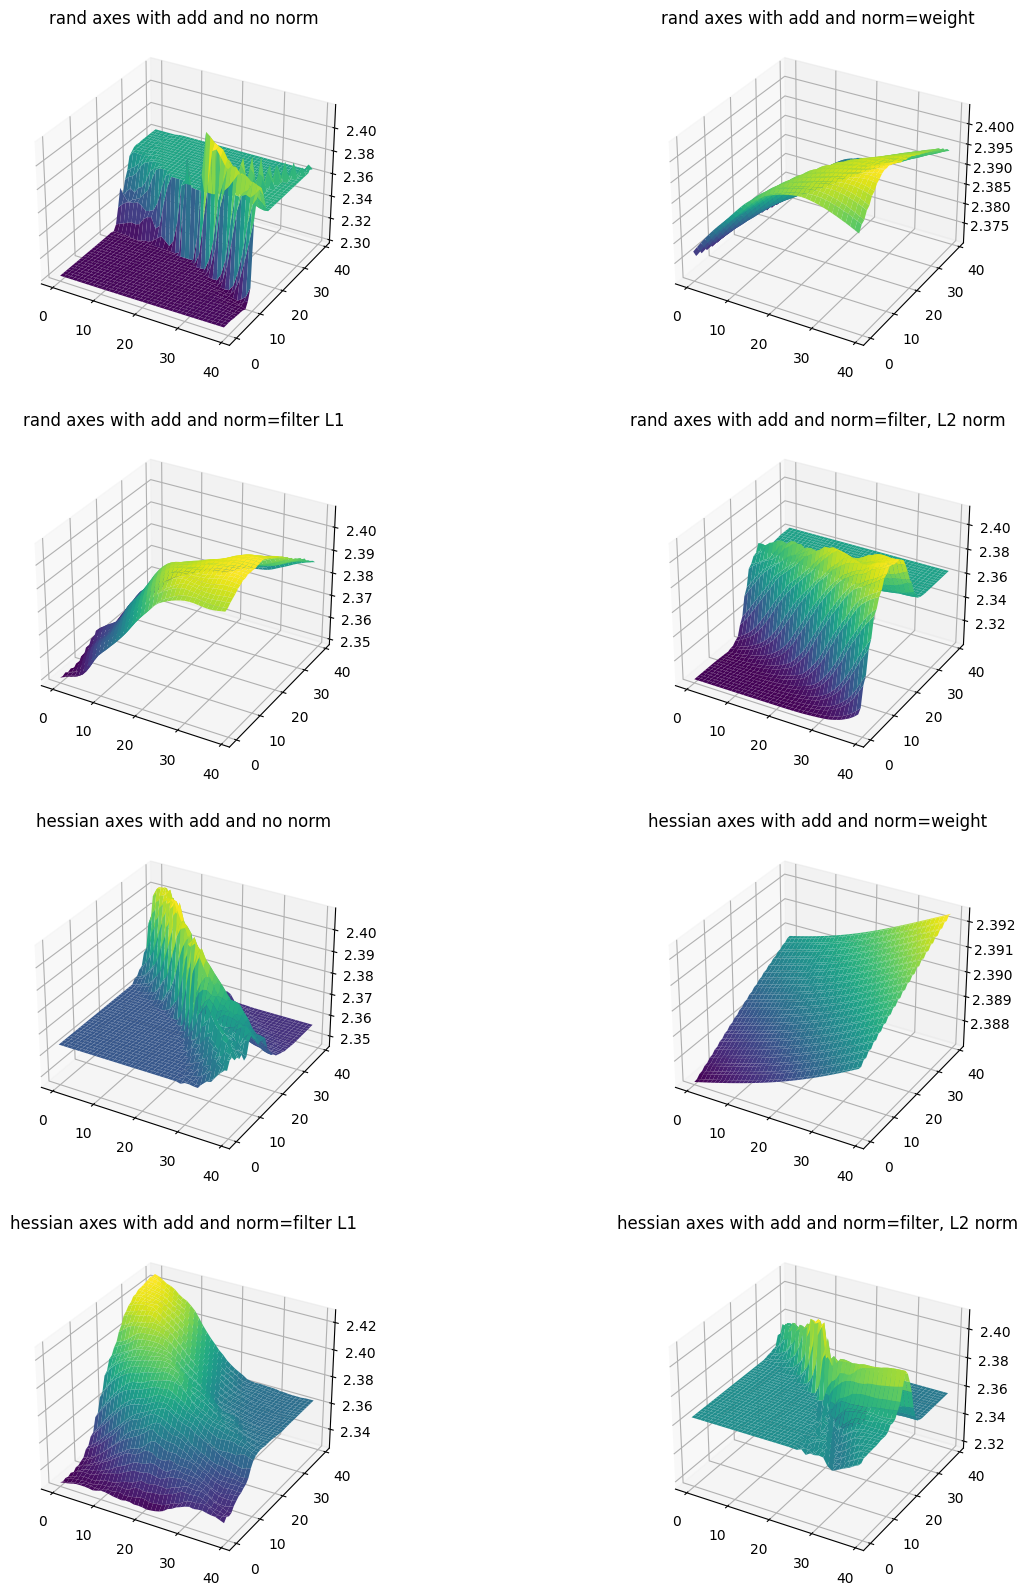

In [10]:
viz_lla(model=model, metric=metric, device=device, dist=dist, steps=steps, axes=axes, normalization=normalization, order=order, 
                    cur_name=cur_name, mode=mode, viz_dev=viz_dev, cap_loss=cap_loss, raa=raa, viz_dir=viz_dir, 
                    eval_hessian=eval_hessian, optimizer=None, to_save=to_save,to_viz=to_viz)

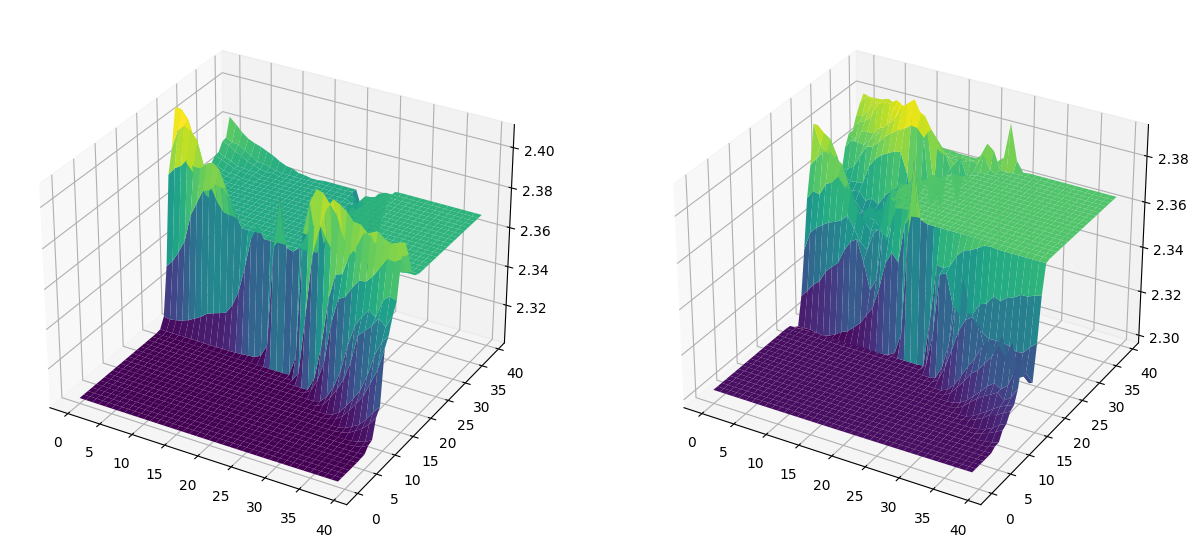

In [11]:
viz_lla(model=model, metric=metric, device=device, dist=dist, steps=steps, axes='random', num_plots=num_plots, normalization=None, order=order, 
                    cur_name=cur_name, mode=mode, viz_dev=False, cap_loss=cap_loss, raa=raa, viz_dir=viz_dir, 
                    eval_hessian=eval_hessian, optimizer=None, to_save=to_save,to_viz=to_viz)